In [24]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [38]:
#!ls "/content/drive/My Drive/"

'''dataset="/kaggle/input/emotion-classification/archive (1)"
print(os.listdir(dataset))'''


# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets list
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
! mkdir train
! unzip /content/ravdess-emotional-speech-audio.zip -d train


Saving kaggle.json to kaggle (4).json
-rw-r--r-- 1 root root 74 Apr 30 15:54 kaggle.json
ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38           8849        187  1.0              
mexwell/heart-disease-dataset                                    🫀 Heart Disease Dataset                          399KB  2024-04-08 09:43:49           4445         77  1.0              
jaceprater/smokers-health-data                                   Smoker's Health Data                              29KB  2024-04-20 17:09:38           2000         26 

[0, 0, 0, 0, 0]
[2, 4, 7, 5, 1]
Value: 2, Count: 192
Value: 4, Count: 192
Value: 7, Count: 192
Value: 5, Count: 192
Value: 1, Count: 96
Value: 8, Count: 192
Value: 6, Count: 192
Value: 3, Count: 192
[1, 1, 2, 2, 1]


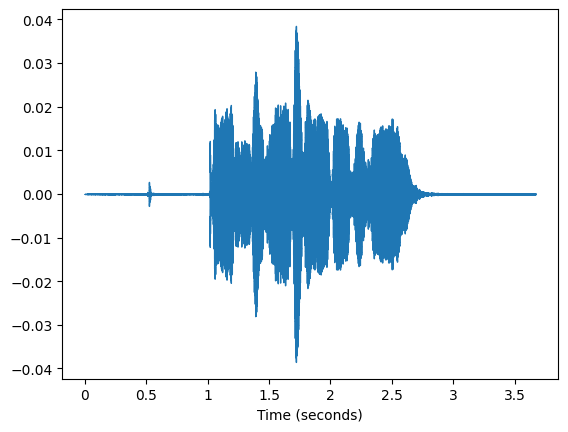

In [45]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from collections import Counter
gender=[]
emotion=[]
intensity=[]
sound_data=[]
sample_rates=[]
dataset='/content/train'
for directory in os.listdir(dataset):
    path=os.path.join(dataset,directory)
    actor=os.listdir(path)

    for file in actor:

        audio_file=os.path.join(path,file)
        if not os.path.isfile(audio_file):  # Check if it's a file
            continue
        y,sr= librosa.load(audio_file, sr=None)
        sound_data.append(y)
        sample_rates.append(sr)
        file=file.split('.')[0]
        gender.append(int(file.split('-')[6])%2)
        emotion.append(int(file.split('-')[2]))
        intensity.append(int(file.split('-')[3]))


       # gender.append(file.split('-')[6])
        #emotion.append(file.split('-')[2])
        #intensity.append(file.split('-')[1])


librosa.display.waveshow(sound_data[0],sr=sample_rates[0],axis='s')
print(gender[100:105])

print(emotion[:5])
count_dict = Counter(emotion)

# Print unique values and their counts
for value, count in count_dict.items():
    print(f"Value: {value}, Count: {count}")
print(intensity[:5])

In [46]:
from keras.preprocessing.sequence import pad_sequences

# Pad or truncate sequences to a fixed length
max_length = max(len(seq) for seq in sound_data)
sound_data = pad_sequences(sound_data, maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Convert to NumPy array



<ipython-input-47-8caf9ed866e7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(['Male', 'Female']), y=gender_counts, palette='Blues')
<ipython-input-47-8caf9ed866e7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(['Neutral', 'Calm', 'Happy', 'Sad','angry','fearfull','disgust','suprised']), y=emotion_counts, palette='Greens')
<ipython-input-47-8caf9ed866e7>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(['Normal','Strong']), y=intensity_counts, palette='Oranges')


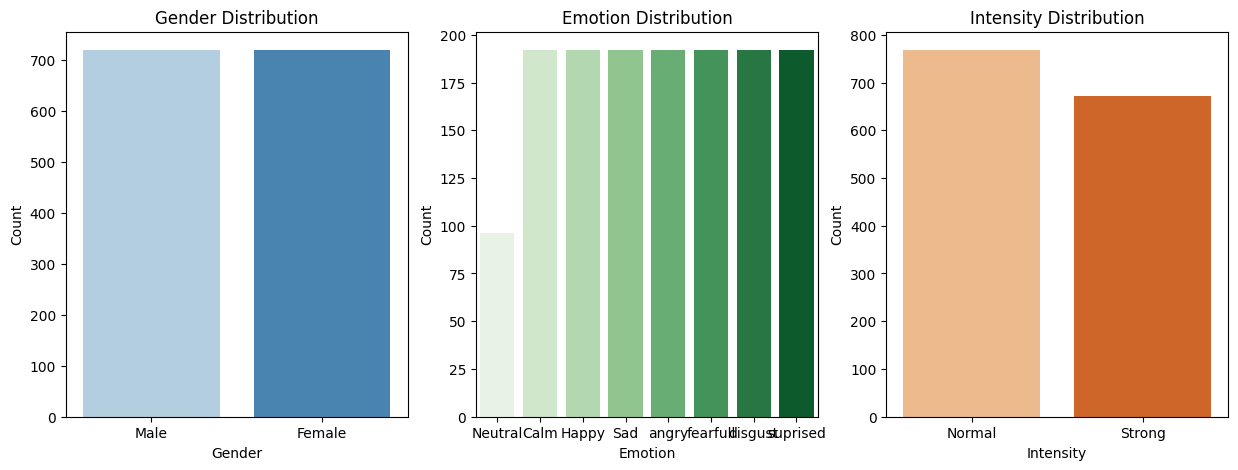

In [47]:
import seaborn as sns

gender_counts = [gender.count(0), gender.count(1)]
emotion_counts = [emotion.count(1), emotion.count(2), emotion.count(3), emotion.count(4),emotion.count(5), emotion.count(6), emotion.count(7), emotion.count(8)]
intensity_counts = [ intensity.count(1), intensity.count(2)]
gender_counts=np.array(gender_counts)
intensity_counts=np.array(intensity_counts)
emotion_counts=np.array(emotion_counts)
# Plotting bar graphs
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=np.array(['Male', 'Female']), y=gender_counts, palette='Blues')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.subplot(1, 3, 2)
sns.barplot(x=np.array(['Neutral', 'Calm', 'Happy', 'Sad','angry','fearfull','disgust','suprised']), y=emotion_counts, palette='Greens')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')

plt.subplot(1, 3, 3)
sns.barplot(x=np.array(['Normal','Strong']), y=intensity_counts, palette='Oranges')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Intensity Distribution')

plt.show()

In [48]:
sound_data = np.array(sound_data)
sample_rates = np.array(sample_rates)



emotion_indices = [i for i, e in enumerate(emotion) if e == 1]

# Oversample emotion value 1 by 1.5 times
oversampled_indices = np.random.choice(emotion_indices, size=int(len(emotion_indices) * 0.5), replace=True)

for idx in oversampled_indices:
    sound_data = np.vstack((sound_data, sound_data[idx]))
    sample_rates = np.hstack((sample_rates, sample_rates[idx]))
    gender.append(gender[idx])
    emotion.append(emotion[idx])
    intensity.append(intensity[idx])

sound_data=np.array(sound_data)
print(sound_data.shape)

(1488, 253053)


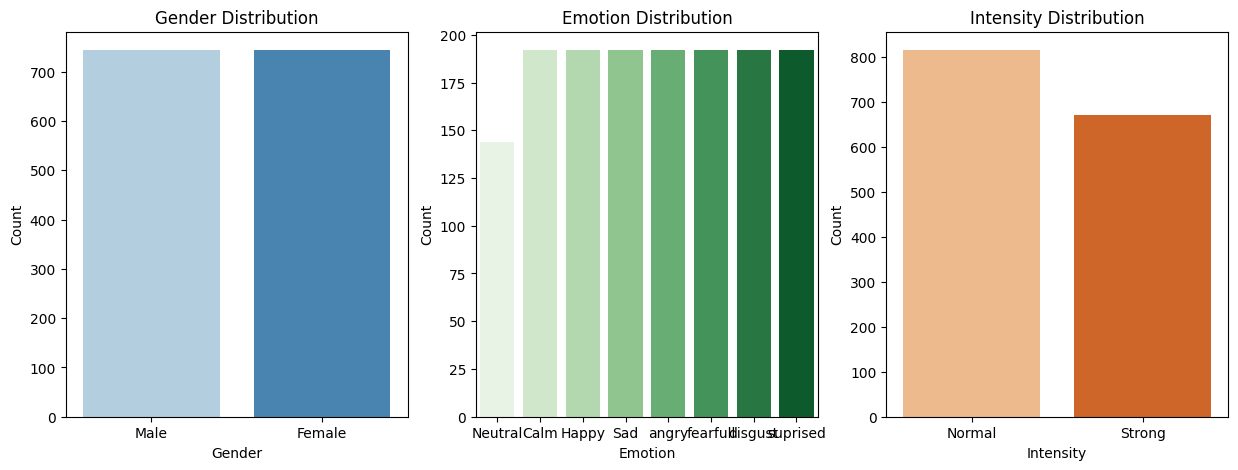

In [ ]:
gender_counts = [gender.count(0), gender.count(1)]
emotion_counts = [emotion.count(1), emotion.count(2), emotion.count(3), emotion.count(4),emotion.count(5), emotion.count(6), emotion.count(7), emotion.count(8)]
intensity_counts = [ intensity.count(1), intensity.count(2)]
gender_counts=np.array(gender_counts)
intensity_counts=np.array(intensity_counts)
emotion_counts=np.array(emotion_counts)
# Plotting bar graphs
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=np.array(['Male', 'Female']), y=gender_counts, palette='Blues')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.subplot(1, 3, 2)
sns.barplot(x=np.array(['Neutral', 'Calm', 'Happy', 'Sad','angry','fearfull','disgust','suprised']), y=emotion_counts, palette='Greens')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')

plt.subplot(1, 3, 3)
sns.barplot(x=np.array(['Normal','Strong']), y=intensity_counts, palette='Oranges')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Intensity Distribution')

plt.show()

shape of spectrogram is  (513, 601)


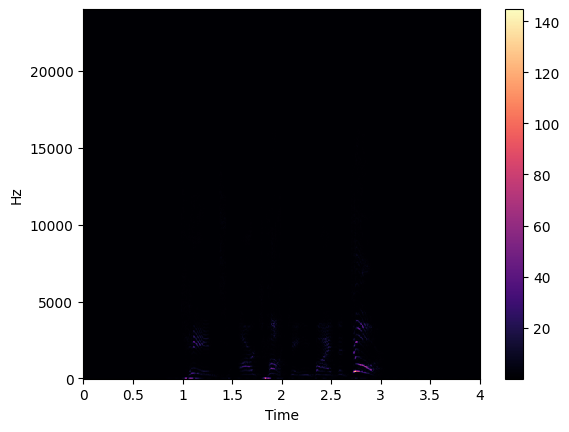

In [ ]:
n_fft=1024
hop_lenght=320
window_type='hann'

spectrogram=np.abs(librosa.stft(y,n_fft=n_fft,hop_length=hop_lenght,win_length=n_fft,window=window_type))
print('shape of spectrogram is ',spectrogram.shape)
librosa.display.specshow(spectrogram,sr=sr,x_axis='time',y_axis='linear',hop_length=hop_lenght)
plt.colorbar()
plt.show()

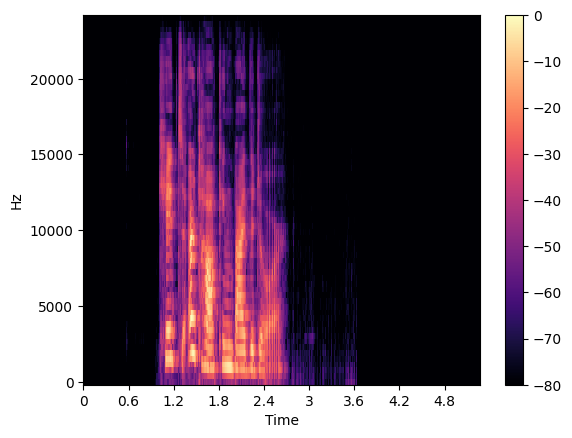

In [ ]:
mal_bins=64    #important
fmin=0
fmax=None
mel_specs=[]
for y,sr in zip(sound_data,sample_rates):
    Mel_spectrogram=librosa.feature.melspectrogram(y=y,sr=sr,n_fft=n_fft,hop_length=hop_lenght,win_length=n_fft,window=window_type,n_mels=mal_bins)
    Mel_spectrogram_db=librosa.power_to_db(Mel_spectrogram,ref=np.max)     #convert to log scale
    mel_specs.append(Mel_spectrogram_db)
librosa.display.specshow(mel_specs[1],sr=sample_rates[1],x_axis='time',y_axis='linear',hop_length=hop_lenght)
plt.colorbar()
plt.show()

In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Convert the mel_specs list to a numpy array
X = np.array(mel_specs)

# Convert the emotion list to a numpy array
y = np.array(emotion)
y=y-1
y=to_categorical(y,num_classes=8)
print(y[0])



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the input data to match the expected input shape of the CNN model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Train the model
model.fit(X_train, y_train, epochs=10 ,validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


[0. 0. 0. 0. 0. 0. 0. 1.]


ValueError: Input 0 of layer "conv2d_4" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 64, 1)

In [ ]:
from keras.layers import LSTM,Dense,Input
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential

y = np.array(emotion)
y=y-1
y=to_categorical(y,num_classes=8)
    # Configures the model for training

X=np.array(sound_data)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Input(shape=(253053, 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(256,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(8,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


(1488, 253053)
Epoch 1/10
